In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy

6.1 Ihmisen lihasvoima kasvaa ihmisen varttuessa, mutta tullessaan liian vanhaksi, voimatasot alkavat taas laskea. Tämä näkyy esimerkiksi Cooperin testin tuloksissa, joita on taulukoita alla ihmisen iän mukaan. Piirrä havaintopisteet pistekaavioon ja sovita niihin toisen asteen polynomi, eli paraabeli. Vaikuttaako jokin havaintopisteistä poikkeavalta arvolta? Piirrä kaavio myös ilman tätä arvoa.
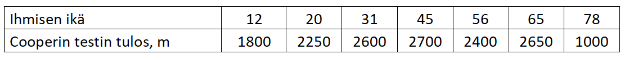

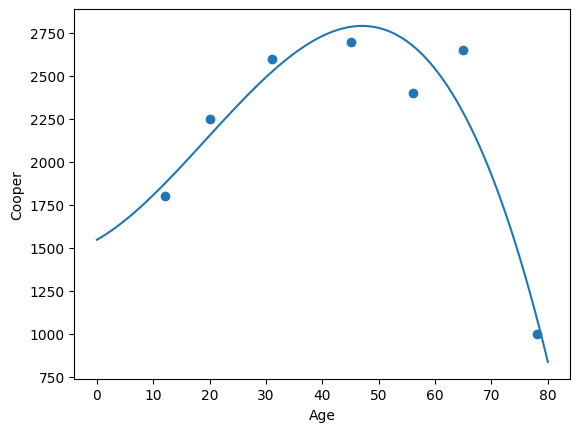

In [2]:
## Code here
humans_age_to_cooper = {12:1800, 20:2250, 31:2600, 45:2700, 56:2400, 65:2650, 78:1000}

humans_age_to_cooper_df = pandas.DataFrame.from_dict(humans_age_to_cooper, orient='index')
humans_age_to_cooper_df.columns = ['Cooper']
humans_age_to_cooper_df.index.name = 'Age'

# just show the data
plt.scatter(humans_age_to_cooper_df.index, humans_age_to_cooper_df.Cooper)
plt.xlabel('Age')
plt.ylabel('Cooper')

# fit a line to the data
model = numpy.poly1d(numpy.polyfit(humans_age_to_cooper_df.index, humans_age_to_cooper_df.Cooper, 3))
line = numpy.linspace(0, 80, 100)
plt.plot(line, model(line))

plt.show()

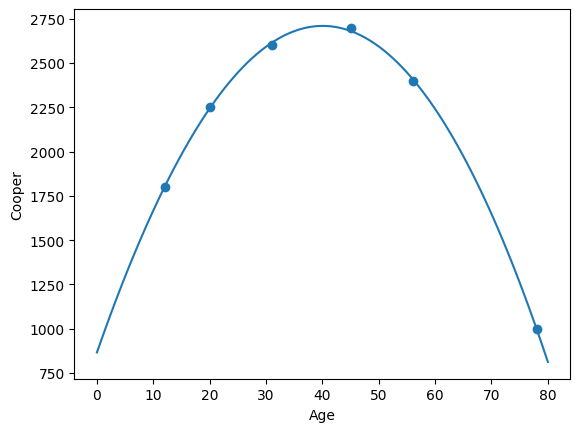

In [3]:
# lets create a copy from the data and remove age 65 outlier
humans_age_to_cooper_df_copy = humans_age_to_cooper_df.copy()
humans_age_to_cooper_df_copy = humans_age_to_cooper_df_copy.drop(65)

# just show the data
plt.scatter(humans_age_to_cooper_df_copy.index, humans_age_to_cooper_df_copy.Cooper)
plt.xlabel('Age')
plt.ylabel('Cooper')

# fit a line to the data
model = numpy.poly1d(numpy.polyfit(humans_age_to_cooper_df_copy.index, humans_age_to_cooper_df_copy.Cooper, 3))
line = numpy.linspace(0, 80, 100)
plt.plot(line, model(line))

plt.show()

6.2 Jos oletamme tehtävän 6.1 polynomiaalisen mallin paikkansapitävyyden (poikkeavan havaintoarvon kanssa), minkä ikäinen olisi henkilö, jonka Cooperin testin tulos on 2000 metriä? Minkä tuloksen 70-vuotias saisi mallin mukaan? Mitä nämä vastaavat arvot olisivat jos käytämme aineistoa, josta on poistettu poikkeava havaintoarvo?

In [4]:
## Code here
coefficients = numpy.polyfit(humans_age_to_cooper_df.index, humans_age_to_cooper_df.Cooper, 2)
regression = numpy.poly1d(coefficients)

coefficients_copy = numpy.polyfit(humans_age_to_cooper_df_copy.index, humans_age_to_cooper_df_copy.Cooper, 2)
regression_copy = numpy.poly1d(coefficients_copy)

def predict_cooper(age):
    return regression(age)

def calculate_age(cooper):
    # return both solutions
    return numpy.roots(regression - cooper)

def predict_cooper_copy(age):
    return regression_copy(age)

def calculate_age_copy(cooper):
    # return both solutions
    return numpy.roots(regression_copy - cooper)

print("===with the outlier===")
print(predict_cooper(70))
print(calculate_age(2000))
print("===without the outlier===")
print(predict_cooper_copy(70))
print(calculate_age_copy(2000))

===with the outlier===
1841.4855735285435
[67.59888066 15.81805217]
===without the outlier===
1643.4684233235416
[64.46420904 15.28601198]


6.3 Sijoittaja lähtee 1000 euron alkupääomalla sijoittamaan osakerahastoon, jonka arvoa on taulukoitu vuosilta 2009-2020 alla olevaan taulukkoon. Prosentuaalinen kasvu on tyypiltään eksponentiaalista, joten sovita havaintopisteisiin eksponentiaalinen regressiokäyrä. Vaikuttaako jokin poikkeavalta arvolta
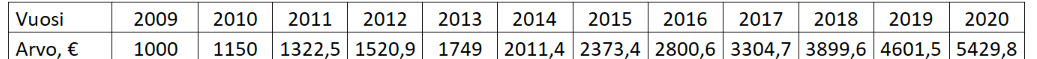

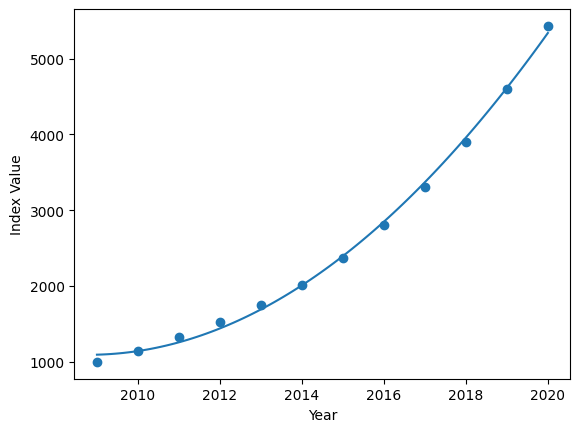

In [5]:
## Code here
year_to_index_value = {2009:1000, 2010:1150, 2011:1322.5, 2012:1520.9, 2013:1749, 2014:2011.4, 2015:2373.4, 2016:2800.6, 2017:3304.7, 2018:3899.6, 2019:4601.5, 2020:5429.8}

year_to_index_value_df = pandas.DataFrame.from_dict(year_to_index_value, orient='index')
year_to_index_value_df.columns = ['Index Value']
year_to_index_value_df.index.name = 'Year'

# just show the data
plt.scatter(year_to_index_value_df.index, year_to_index_value_df['Index Value'])
plt.xlabel('Year')
plt.ylabel('Index Value')

# fit a line to the data
model = numpy.poly1d(numpy.polyfit(year_to_index_value_df.index, year_to_index_value_df['Index Value'], 2))
line = numpy.linspace(2009, 2020, 100)
plt.plot(line, model(line))

plt.show()


There are no outliers

6.4 Jos oletamme tehtävän 6.3 eksponentiaalisen mallin paikkansapitävyyden, mikä olisi osakerahaston arvo vuonna 2050? Minä vuonna rahaston arvo ylittäisi miljoonan? Laske lisäksi eksponentiaalisen regressiokäyrän yhtälöstä, mikä on mallin mukainen vuosittaisen kasvun korkokerroin ja korkoprosentti

In [6]:
## Code here
# lets create the coefficients
fit = numpy.polyfit(year_to_index_value_df.index, numpy.log(year_to_index_value_df['Index Value']), 1)

print(fit)

f1 = numpy.exp(fit[0])
f2 = numpy.exp(fit[1])

def calculate_index_value(year, fit):
    return numpy.exp(fit[1]) * numpy.exp(fit[0] * year)

print(calculate_index_value(2021, fit))

# annual growth rate and interest rate
annual_growth_rate = f1 - 1
interest_rate = f1 - 1

print(annual_growth_rate)
print(interest_rate)


[ 1.54258873e-01 -3.03032984e+02]
6149.94461406518
0.166792898959079
0.166792898959079


6.5 Maanjäristyksen voimakkuus määritellään Richterin magnitudin asteikolla, joka on logaritminen asteikko seismogrammin suurimman amplitudin suhteen. Alla on taulukoitu maanjäristyksien seismogrammien amplitudeja ja niitä vastaavia Richterin magnitudeja. Sovita aineistoon logaritminen regressiokäyrä ja laita näkyviin käyrän yhtälö. Vaikuttaako jokin poikkeavalta arvolta?
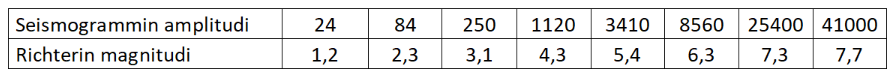

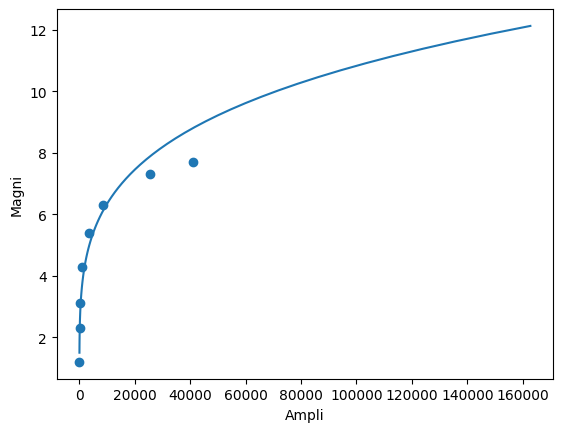

In [7]:
## Code here
ampli_to_magni = {24:1.2, 84:2.3, 250:3.1, 1120:4.3, 3410:5.4, 8560:6.3, 25400:7.3, 41000:7.7}

ampli_to_magni_df = pandas.DataFrame.from_dict(ampli_to_magni, orient='index')
ampli_to_magni_df.columns = ['Magni']
ampli_to_magni_df.index.name = 'Ampli'

# just show the data
plt.scatter(ampli_to_magni_df.index, ampli_to_magni_df['Magni'])
plt.xlabel('Ampli')
plt.ylabel('Magni')

# fit a line to the data, keep in mind that it is a log-log plot
model = numpy.poly1d(numpy.polyfit(numpy.log(ampli_to_magni_df.index), numpy.log(ampli_to_magni_df['Magni']), 1))
line = numpy.linspace(3, 12, 100)
plt.plot(numpy.exp(line), numpy.exp(model(line)))

plt.show()

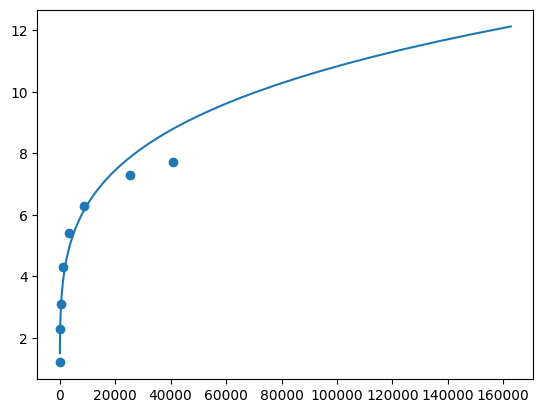

In [8]:
# lets use scipy to fit the line better and plot it
# fit a line to the data, keep in mind that it is a log-log plot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(numpy.log(ampli_to_magni_df.index), numpy.log(ampli_to_magni_df['Magni']))
line = numpy.linspace(3, 12, 100)
plt.plot(numpy.exp(line), numpy.exp(intercept + slope * line))
plt.scatter(ampli_to_magni_df.index, ampli_to_magni_df['Magni'])

plt.show()


6.6 Jos oletamme tehtävän 6.5 logaritmisen mallin paikkansapitävyyden, mikä olisi Richterin asteikon mukainen magnitudi maanjäristykselle, jonka amplitudi on 15000? Mikä olisi 5 Richterin magnitudin maanjäristyksen aiheuttama amplitudi?

In [31]:
## Code here
# lets create the coefficients
y = ampli_to_magni.values()
x = ampli_to_magni.keys()

y = numpy.array(list(y))
x = numpy.array(list(x))

fit = numpy.polyfit(numpy.log(x), y, 1)

print(fit)

# print the logaritmic regression equation a+ b*ln(x)
print("y = " + str(fit[1]) + " + " + str(fit[0]) + "*ln(x)")

def calculate_magni(ampli, fit):
    return fit[1] + fit[0] * numpy.log(ampli)

print(f"magnitude at 15000: {calculate_magni(15_000, fit)}")

def calculate_ampli(magni, fit):
    return numpy.exp((magni - fit[1]) / fit[0])

print(f"amplitude at 5: {calculate_ampli(5, fit)}")

print("There is a small difference between the regression and the calculated value. but this is close enough.")
print(calculate_magni(8560, fit))


[ 0.87683651 -1.66852611]
y = -1.6685261100409863 + 0.876836513443231*ln(x)
magnitude at 15000: 6.762963241064487
amplitude at 5: 2008.6343259850564
There is a small difference between the regression and the calculated value. but this is close enough.
6.2711017892484096
